In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

## Ejercicio 1

### Ejercicio a
Utilizando `seaborn.objects`, graficar la curva de la expectativa de vida en Argentina en
función del año.

In [2]:
gapminder = pd.read_csv("../_src/gapminder.csv",index_col=0)
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


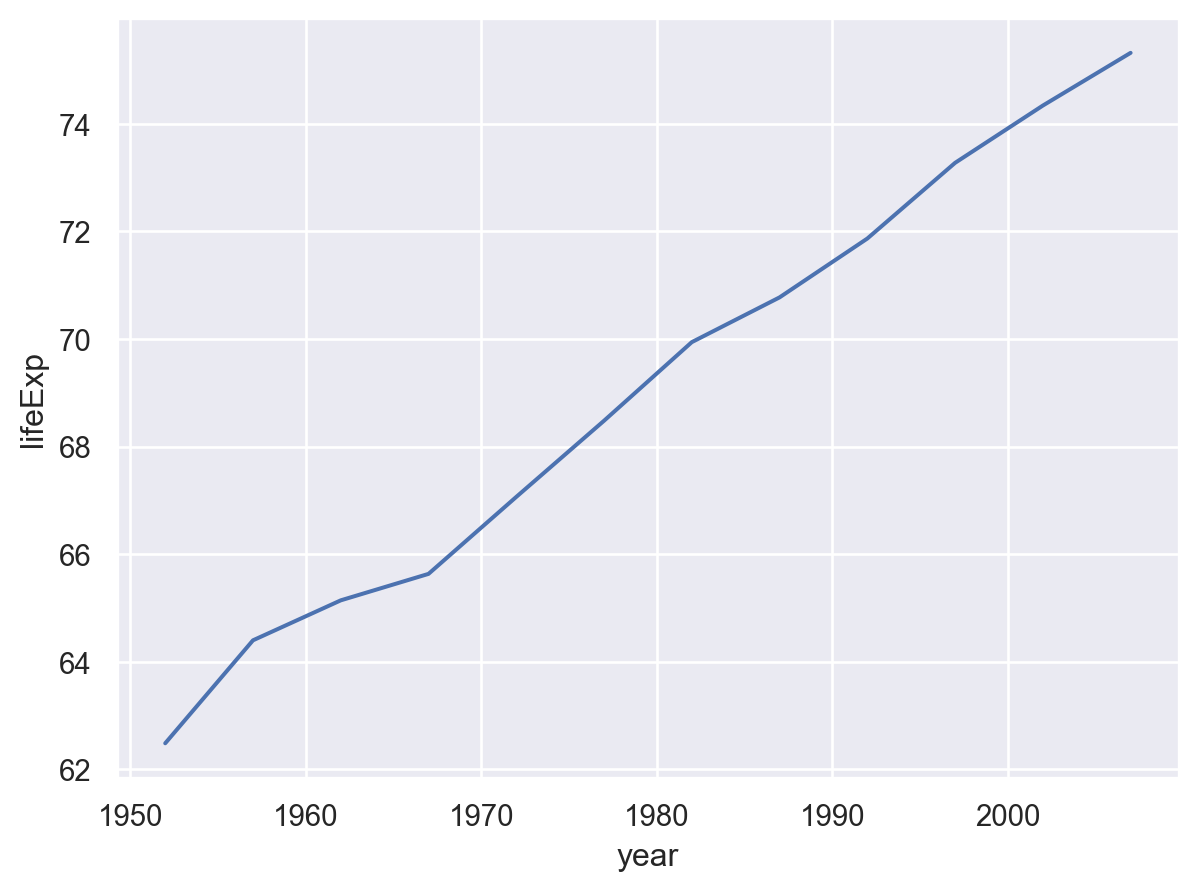

In [13]:
datosArgentina = gapminder[gapminder.country == "Argentina"]
(
    so.Plot(data = datosArgentina, x = "year", y = "lifeExp")
    .add(so.Line())
)

### Ejercicio b
Realizar un nuevo gráfico donde puedan verse las curvas de la expectativa de vida de los
países de América en función del año, una curva por cada país.
Sugerencia: utilizar los parámetros `group = ???` o `color = ???`. ¿Cuál es la diferencia
entre los dos?

In [16]:
# Quiero ver como estan escritas las columnas
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [15]:
# Para saber que continentes hay y como estan escritos
gapminder["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

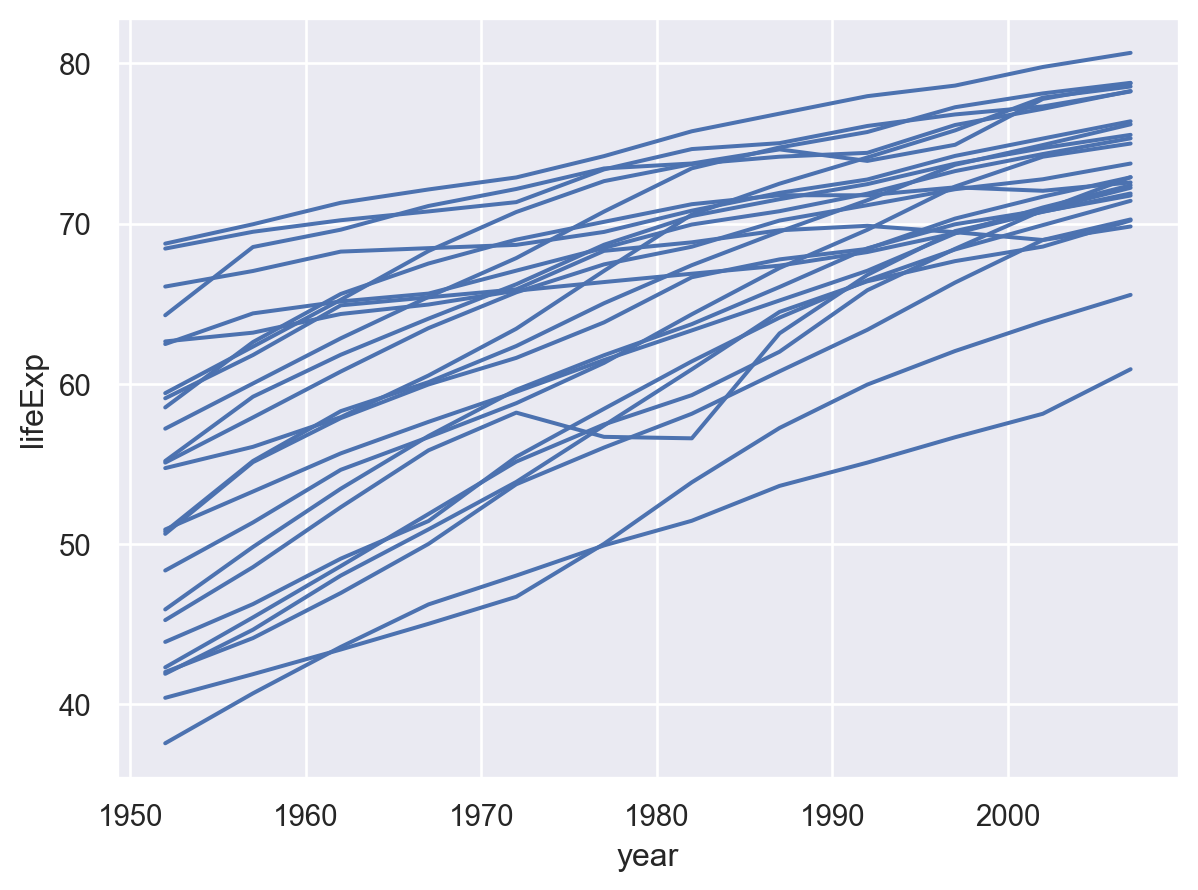

In [19]:
datosAmerica = gapminder[gapminder["continent"] == "Americas"]
(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp", group = "country")
    .add(so.Line())
)

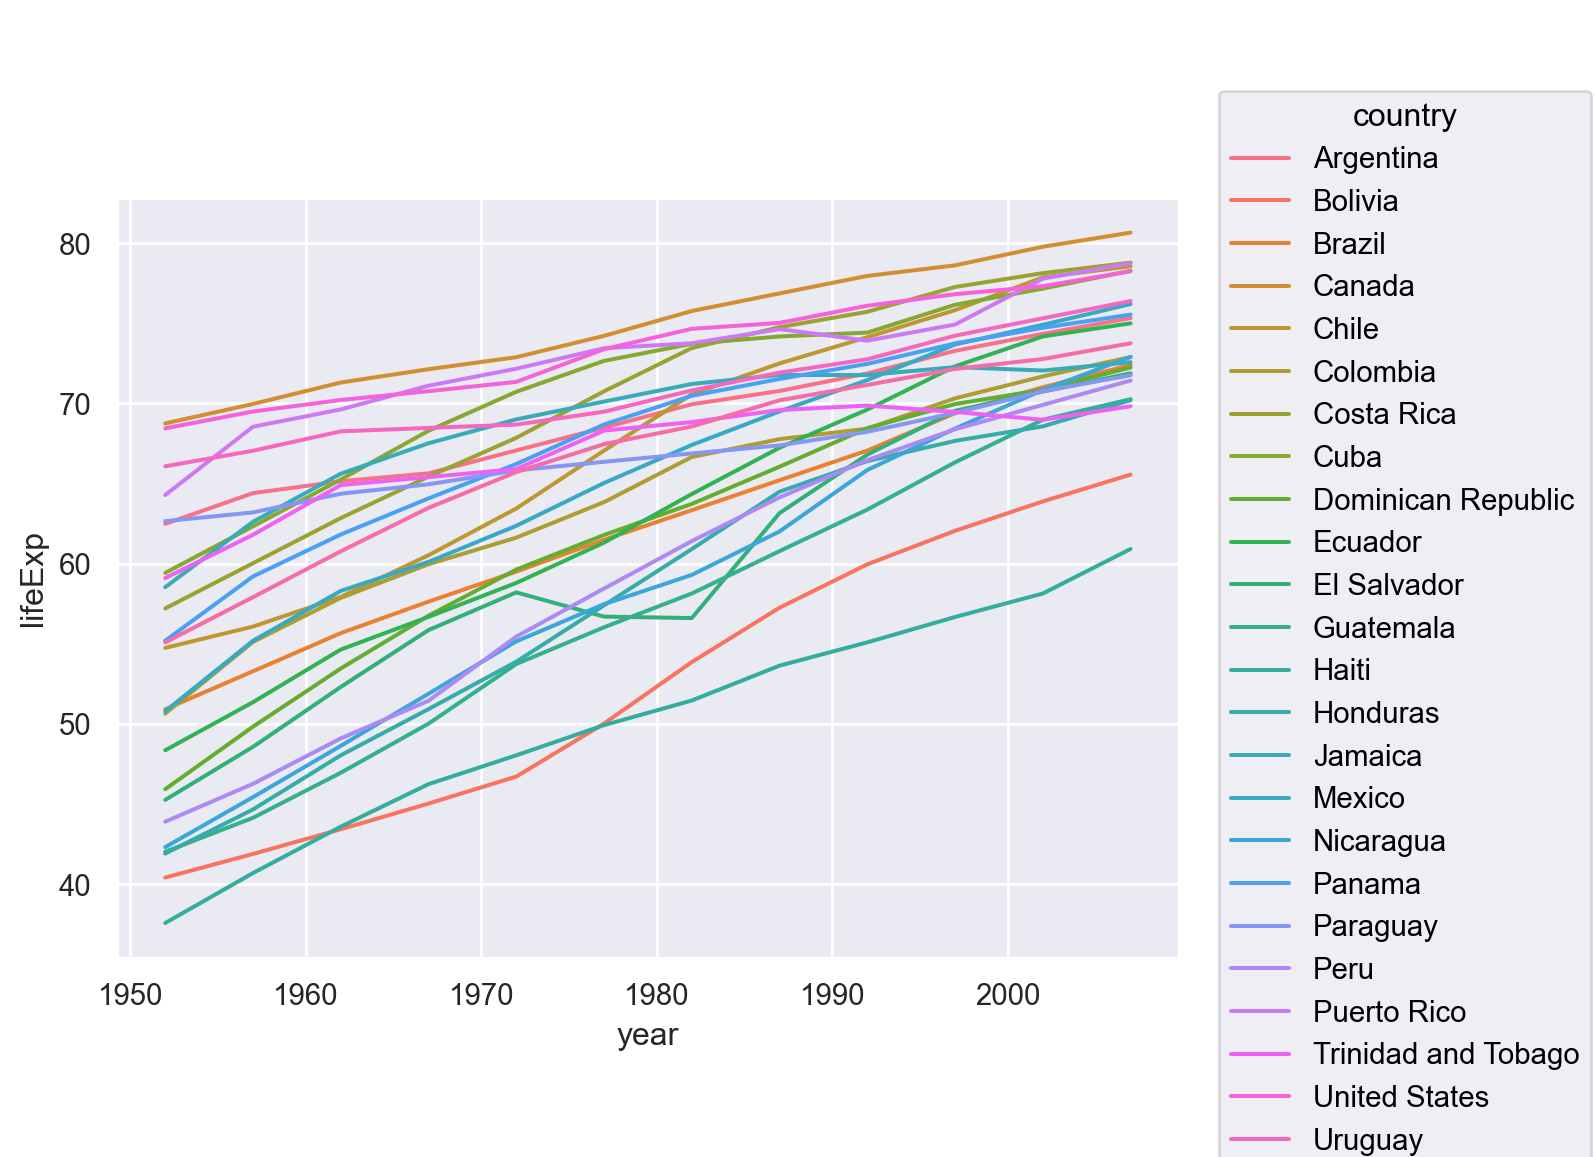

In [29]:
(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp", color = "country")
    .add(so.Line())
)

### Ejercicio C
 Queremos agregar al gráfico del ítem anterior una curva de tendencia lineal utilizando el
método `.add(so.Line(), so.PolyFit(1))`. ¿Cuál de las siguientes dos formas de agrupar
los datos es la forma correcta?

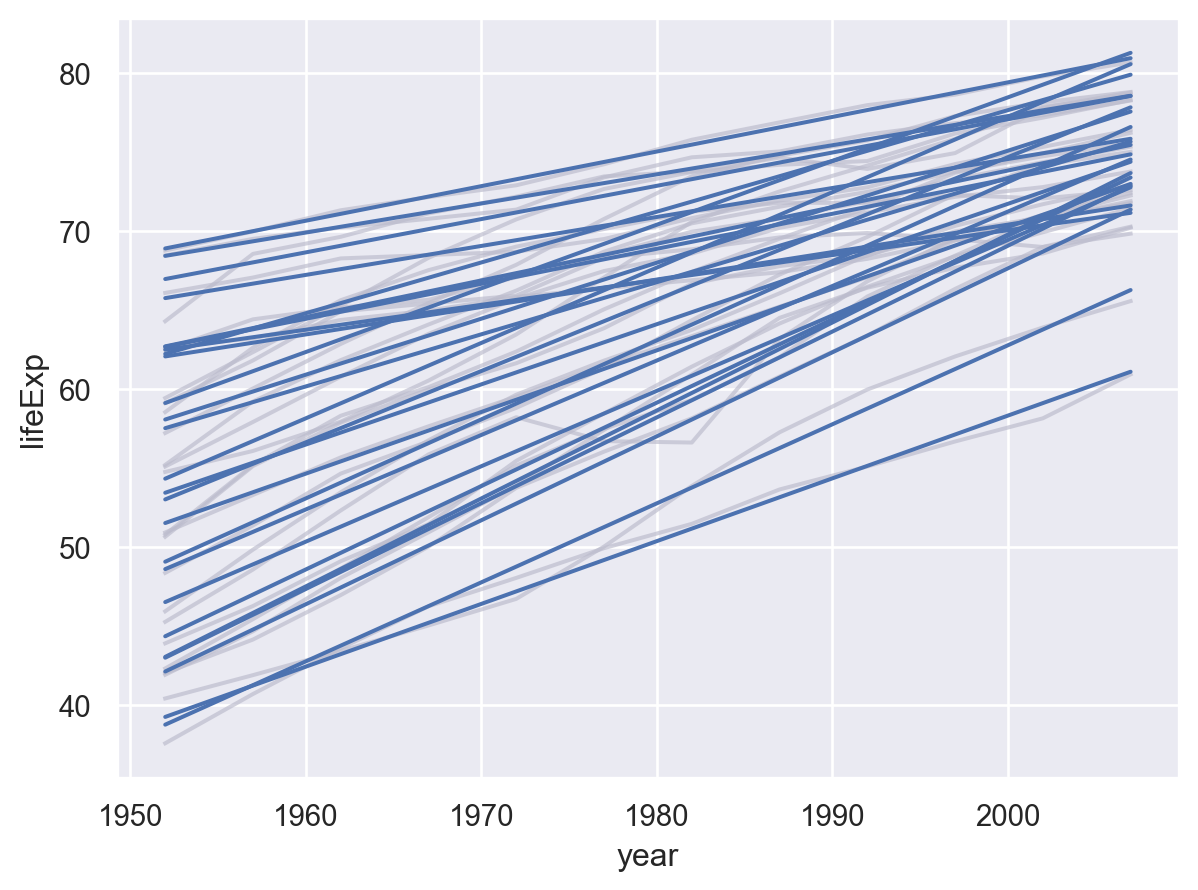

In [31]:
(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp", group = "country")
    .add(so.Lines(color="#bbca"))
    .add(so.Line(), so.PolyFit(1))
)

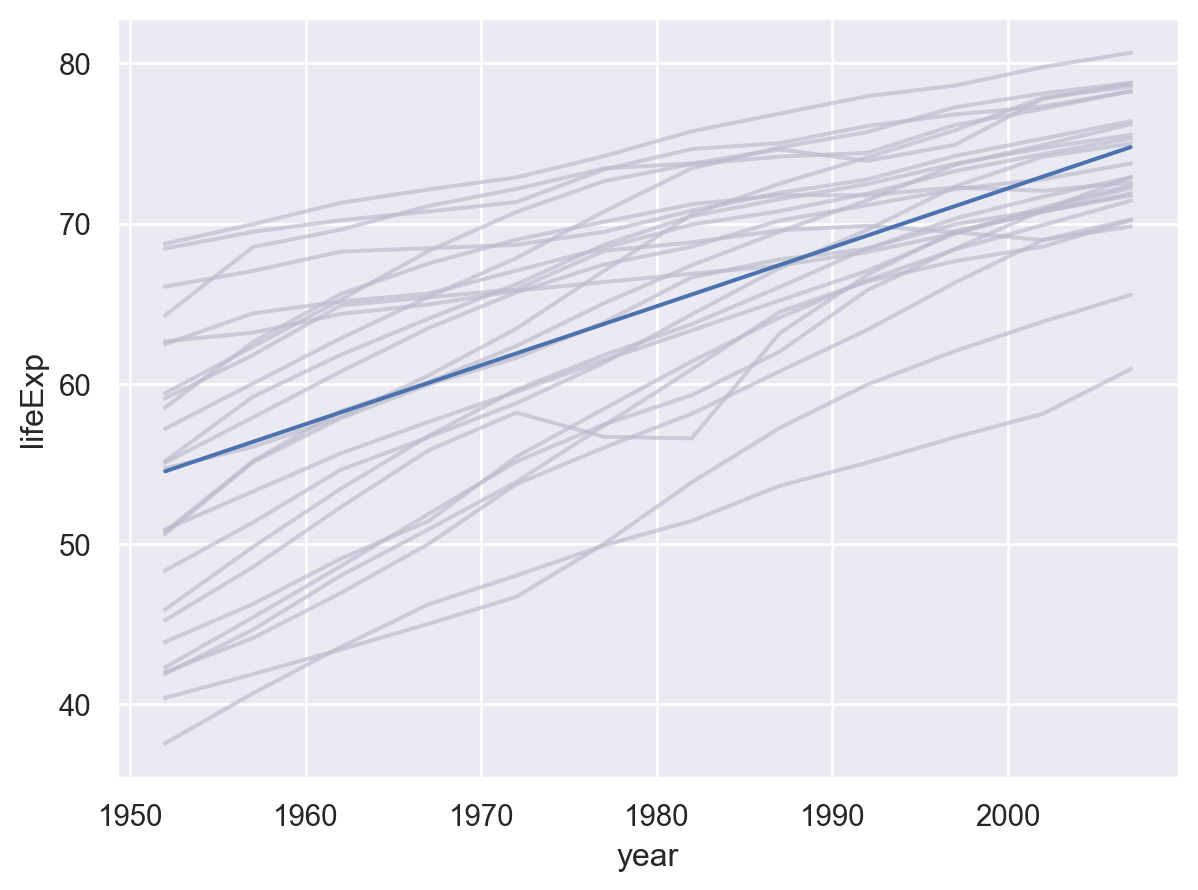

In [27]:
(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp")
    .add(so.Lines(color="#bbca"), group = "country")
    .add(so.Line(), so.PolyFit(1))
)

En la documentacion, dice que groups hace lo siguiente: 
- **_The group property is special in that it does not change anything about the mark’s appearance but defines additional data subsets that transforms should operate on independently._**

Por lo que en el primer grafico, hace la tendencia lineal para cada pais agrupado. Y en el segundo lo hace para el promedio de todos los paises.

### Ejercicio D

Realizar el siguiente gráfico, con las curvas de expectativa de vida agrupadas por continente. Sugerencias: ¿qué hace el método `facet()` de `seaborn.objects.Plot()`? ¿Y el
parámetro `wrap = ???` de `facet()`?

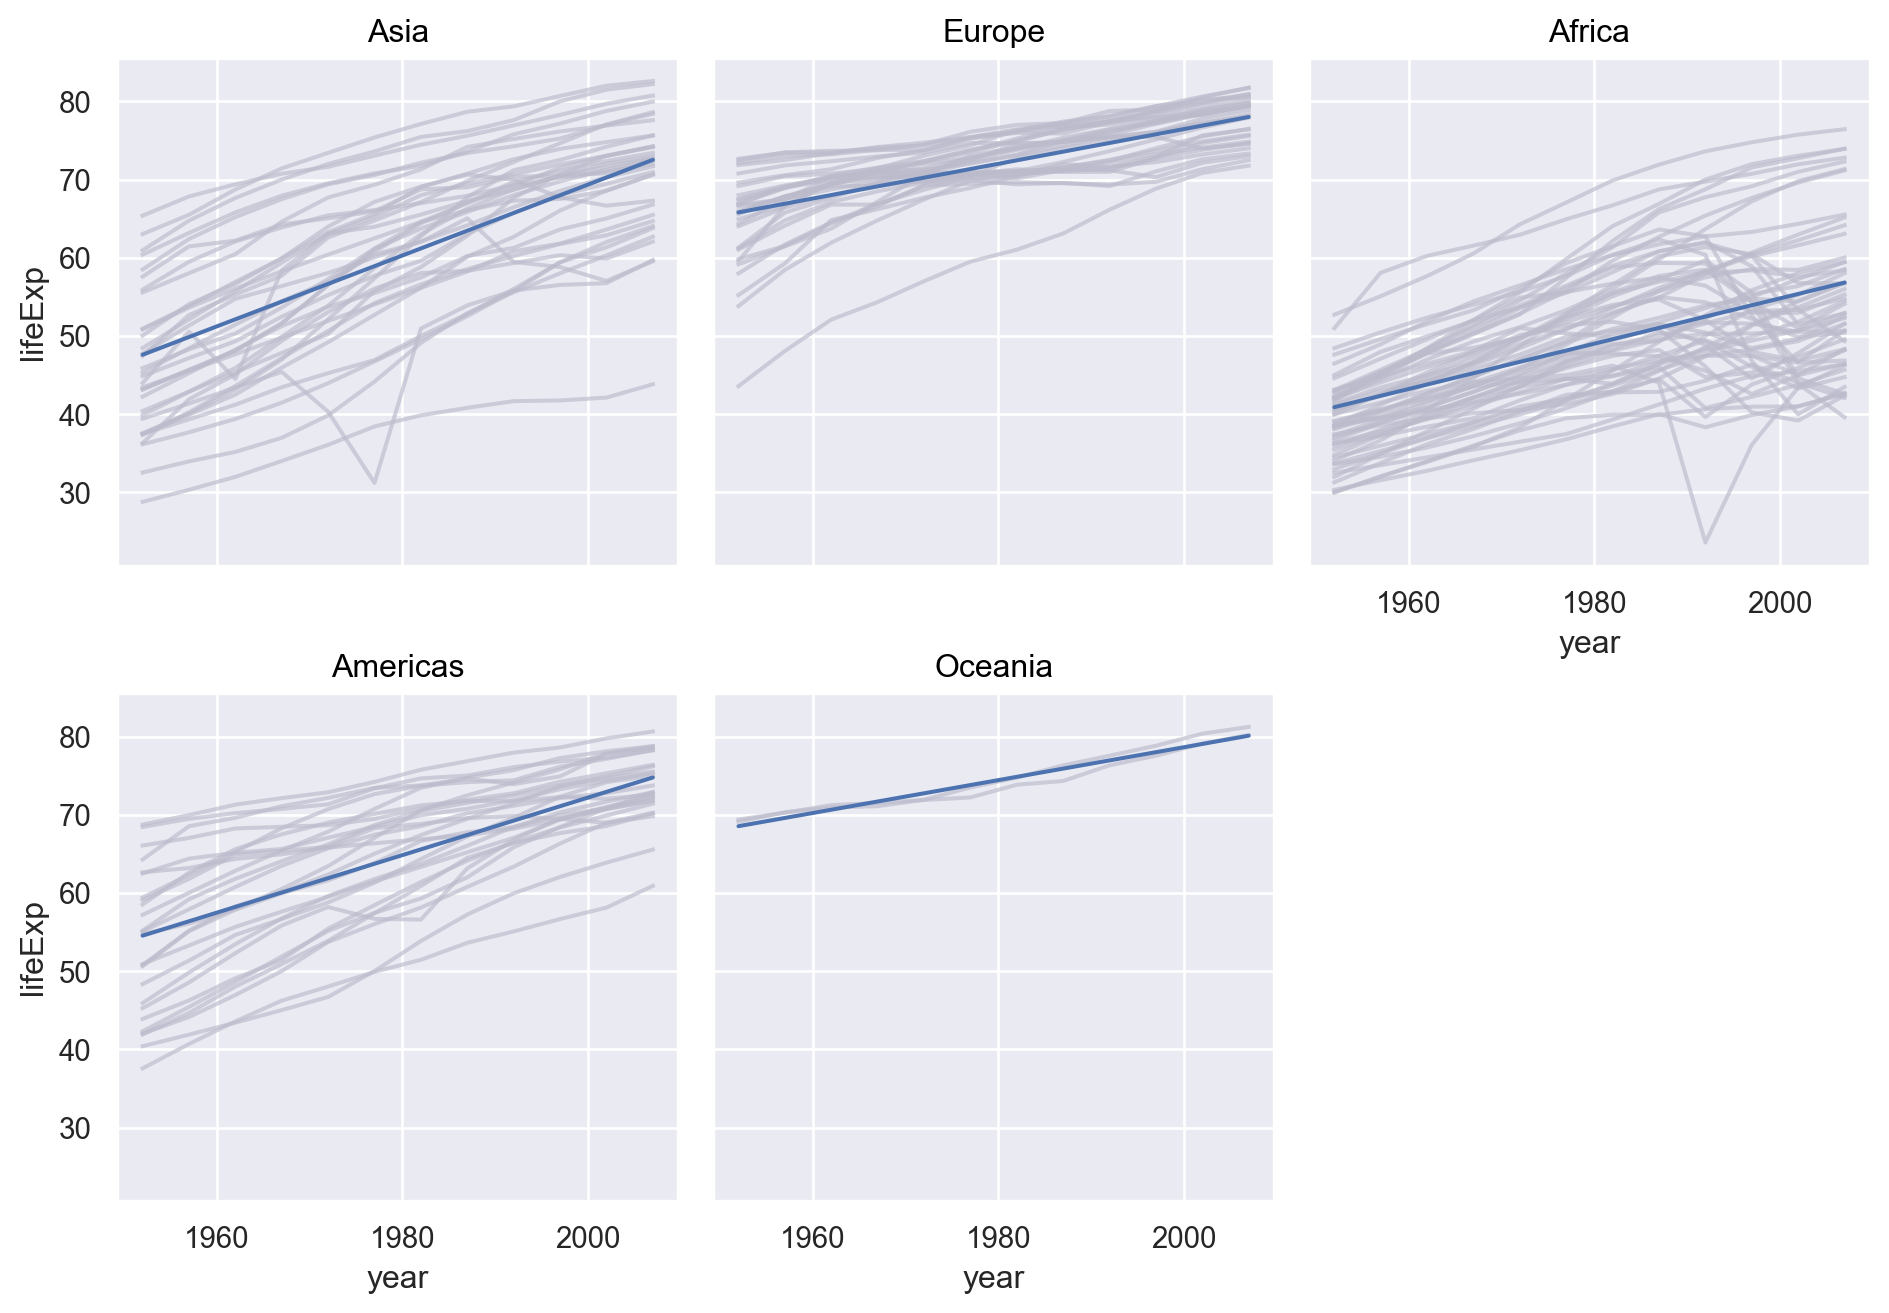

In [51]:
(
    so.Plot(data = gapminder, x = "year", y = "lifeExp")
    .add(so.Lines(color="#bbca"),group="country")
    .add(so.Line(), so.PolyFit(1))
    .facet("continent",wrap=3)
    .layout(size=(10, 7))
)

## Ejercicio 2

En los siguientes ejercicios vamos a trabajar con el dataset penguins disponible en la biblioteca
seaborn. ¿Cuántas filas y columnas hay en el dataset penguins?

In [2]:
penguins = sns.load_dataset("penguins")

In [6]:
filas,columnas = penguins.shape

print(f"Hay {filas} filas y {columnas} columnas")

Hay 344 filas y 7 columnas


## Ejercicio 3

¿Que resultado esperan para el siguiente grafico? ¿Cuales codificaciones se pasan de `Plot()`
a `Dot()` y cuales no pueden pasarse? ¿Cuales codificaciones se establecen en `Dot()`? ¿Cuales
variables estan asignadas directamente en `Dot()`? ¿De que color van a pintarse los puntos?

In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

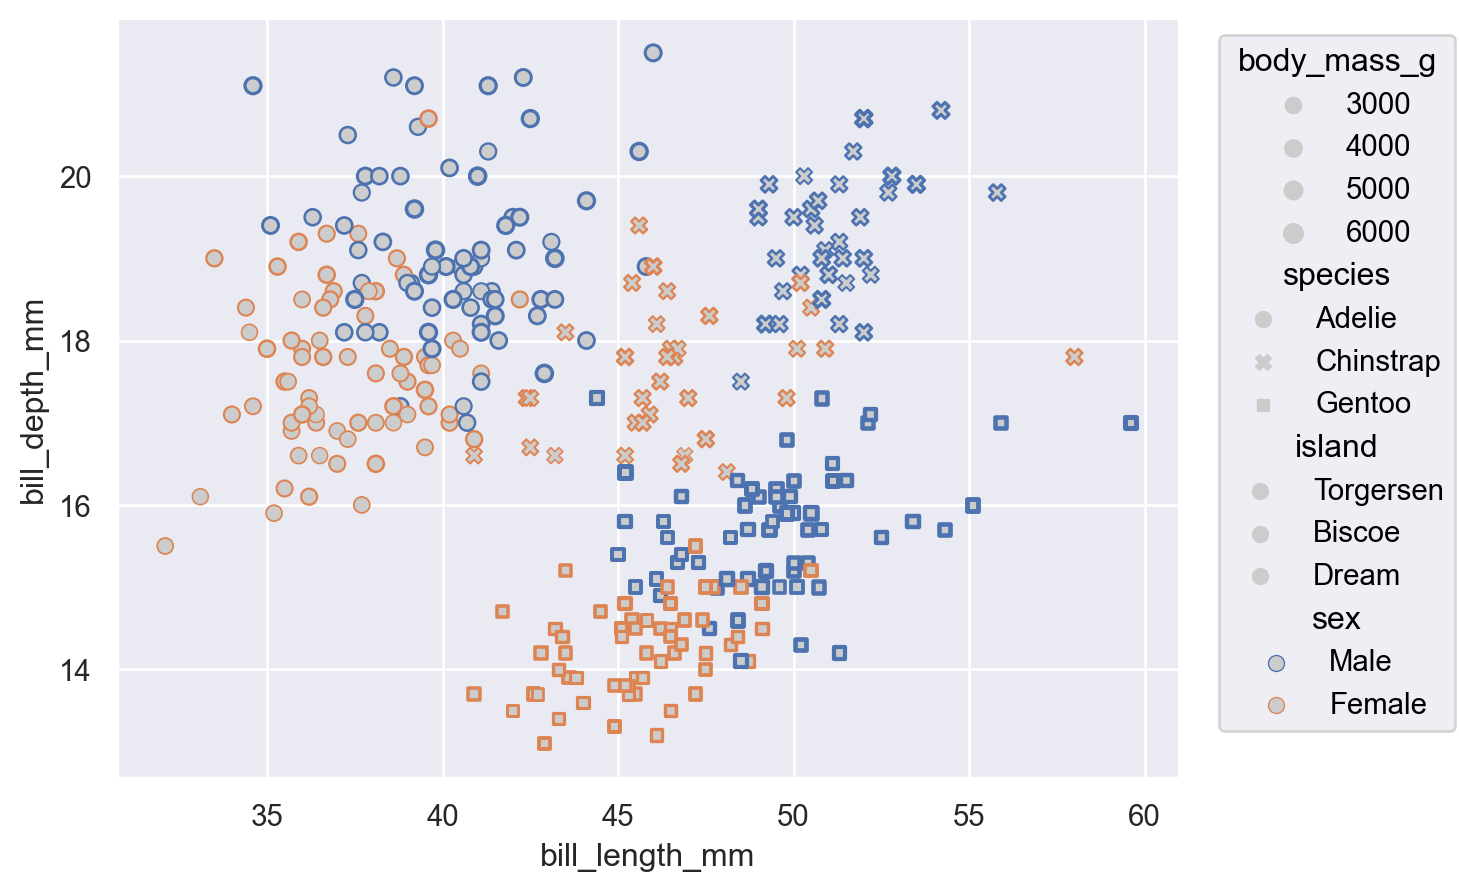

In [12]:
(
    so.Plot(
        penguins , x ="bill_length_mm", y ="bill_depth_mm",
        edgewidth ="body_mass_g", marker = "species",
        linestyle = "island", color = "species"
)
.add(so.Dot(color =".8") , edgecolor ="sex")
)

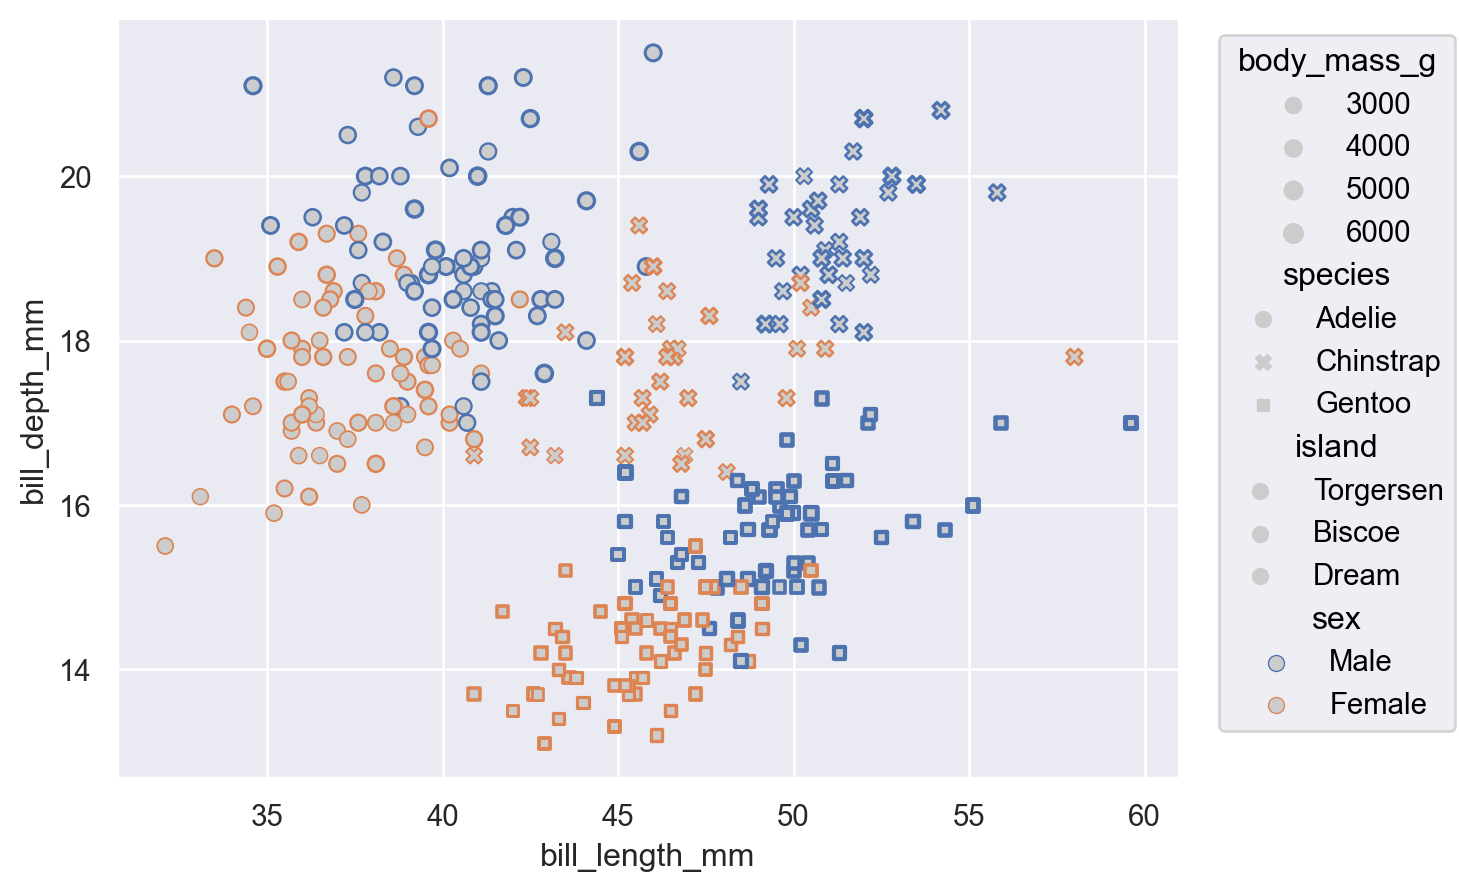

In [13]:
(
    so.Plot(
        penguins , x ="bill_length_mm", y ="bill_depth_mm",
        edgewidth ="body_mass_g", marker = "species",
        linestyle = "island"
)
.add(so.Dot(color =".8") , edgecolor ="sex")
)

## Ejercicio 4

A. Hacer un grafico de dispersion de *bill_depth_mm* (en el eje $x$) vs. *bill_length_mm* (en el
eje $y$).


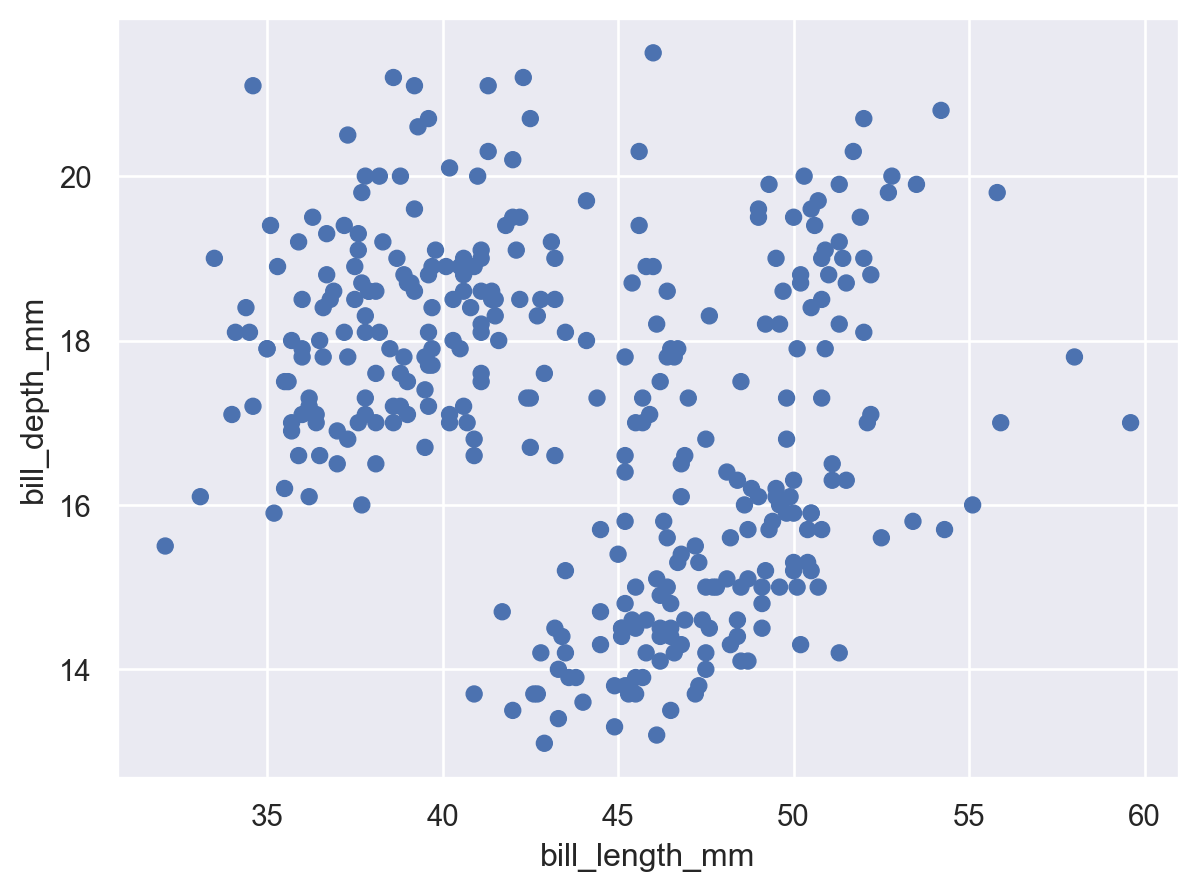

In [17]:
(
    so.Plot(
        penguins , x ="bill_length_mm", y ="bill_depth_mm"
)
.add(so.Dot())
)

B. ¿Distinguen grupos distintos de puntos en el grafico? ¿A que puede deberse?

Me da la idea de que podria ser que sean *3 grupos distintos*.

Que serian los siguientes a mi criterio: 

<img src="../_src/images/dispersion_4A.png" width=450>

Creo que puede deberse a que las canidades acumuladas en cada centro de los circulos hechos por mi. (Los hice en paint)


C. Introducir alguna modificacion en el grafico anterior para verificar o refutar su conjetura
del ıtem anterior

In [35]:
print(penguins.columns)
print(f"\n Las especies que existen son {penguins["species"].unique()}")


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

 Las especies que existen son ['Adelie' 'Chinstrap' 'Gentoo']


In [36]:
for columna in penguins.columns:
    print(f"Hay {penguins[columna].nunique()} valores unicos en la columna {columna}")

Hay 3 valores unicos en la columna species
Hay 3 valores unicos en la columna island
Hay 164 valores unicos en la columna bill_length_mm
Hay 80 valores unicos en la columna bill_depth_mm
Hay 55 valores unicos en la columna flipper_length_mm
Hay 94 valores unicos en la columna body_mass_g
Hay 2 valores unicos en la columna sex


Voy a agrupar por `species`,`island` y `sex` para poder afirmar o refutar mi hipotesis

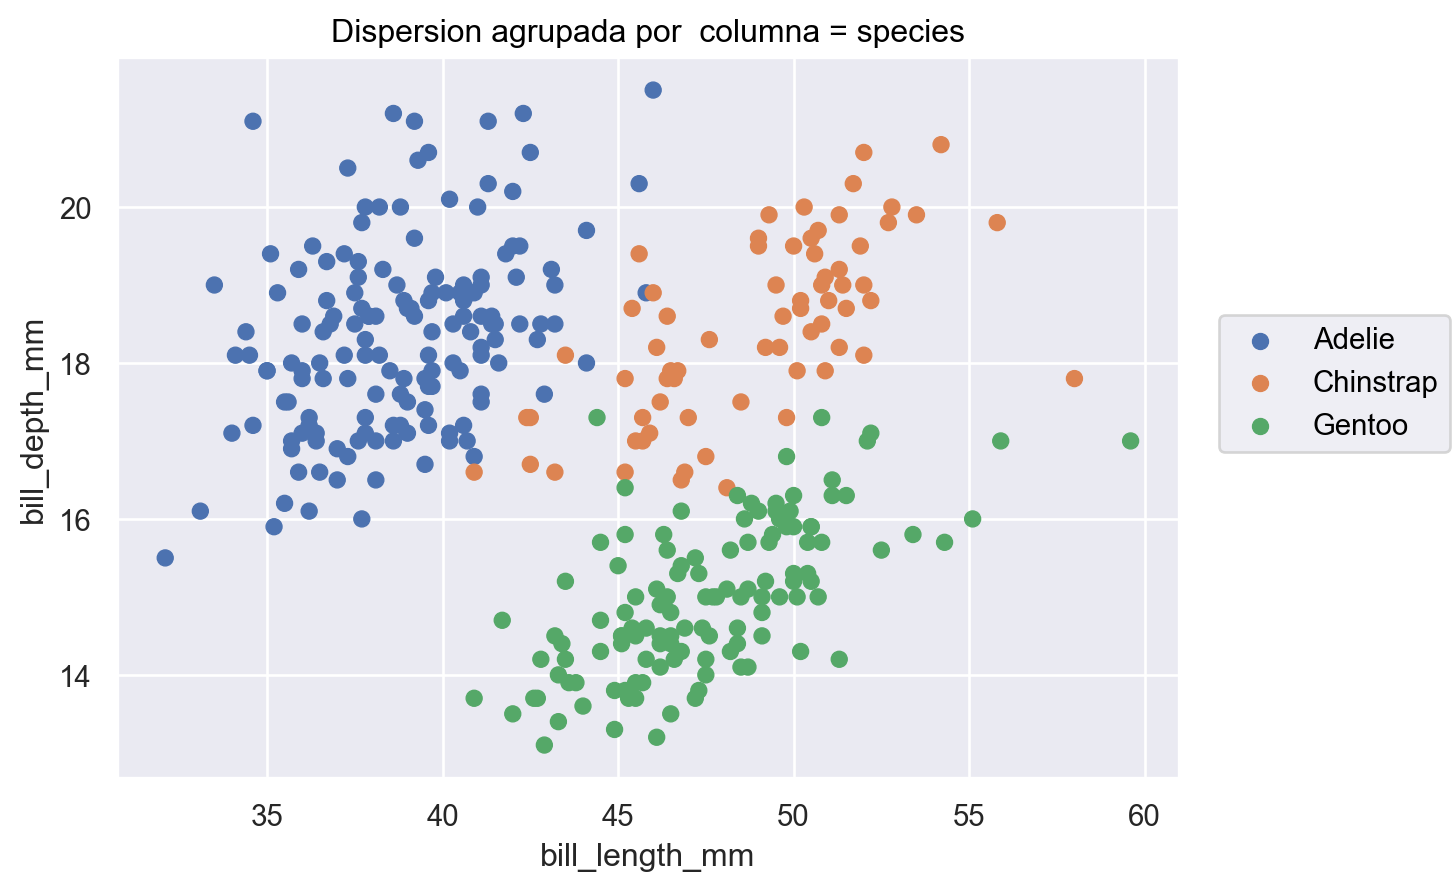

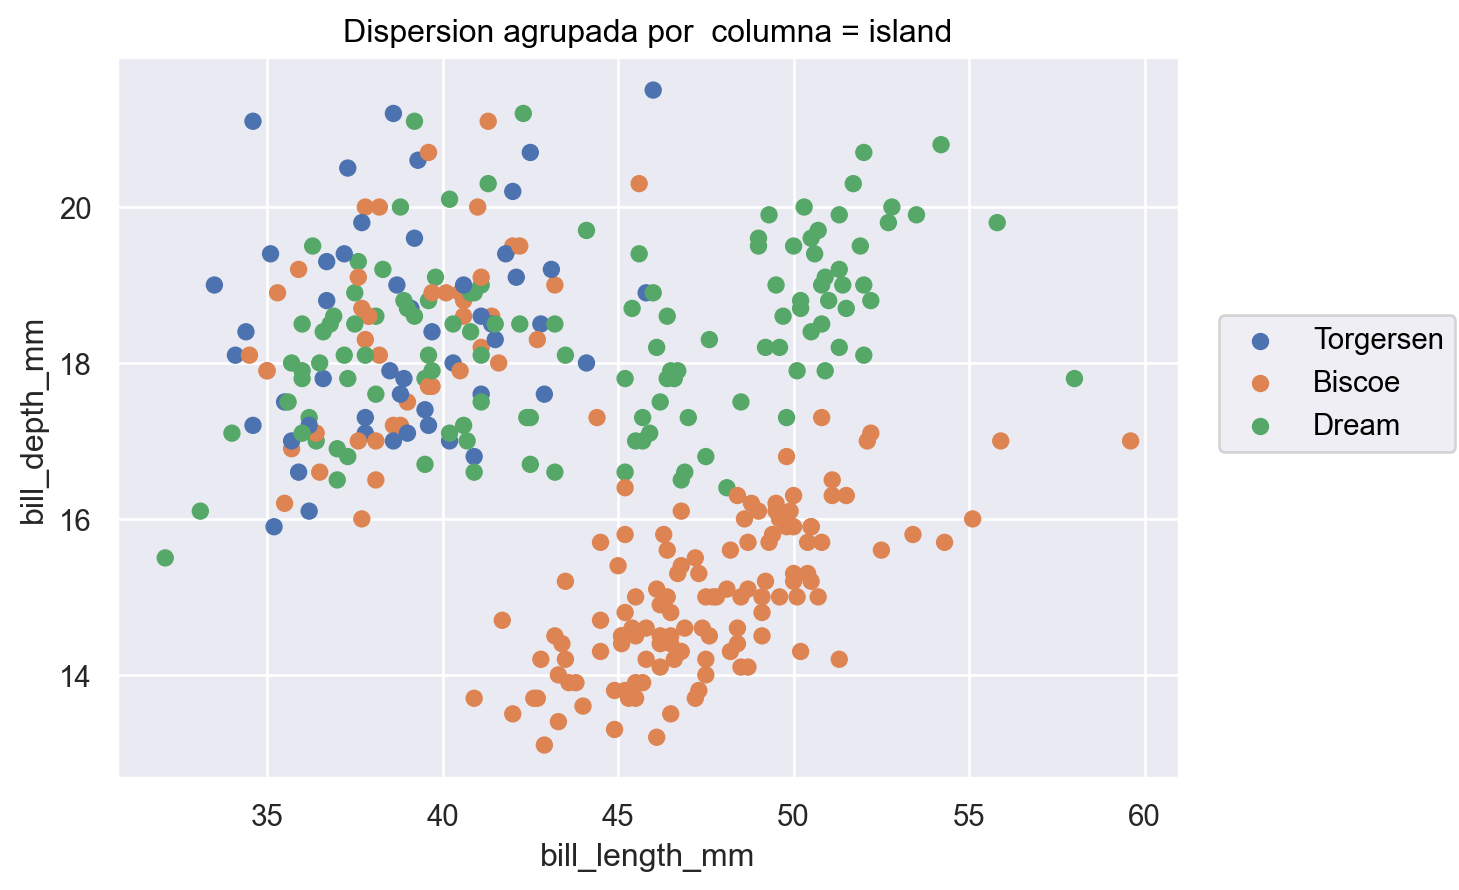

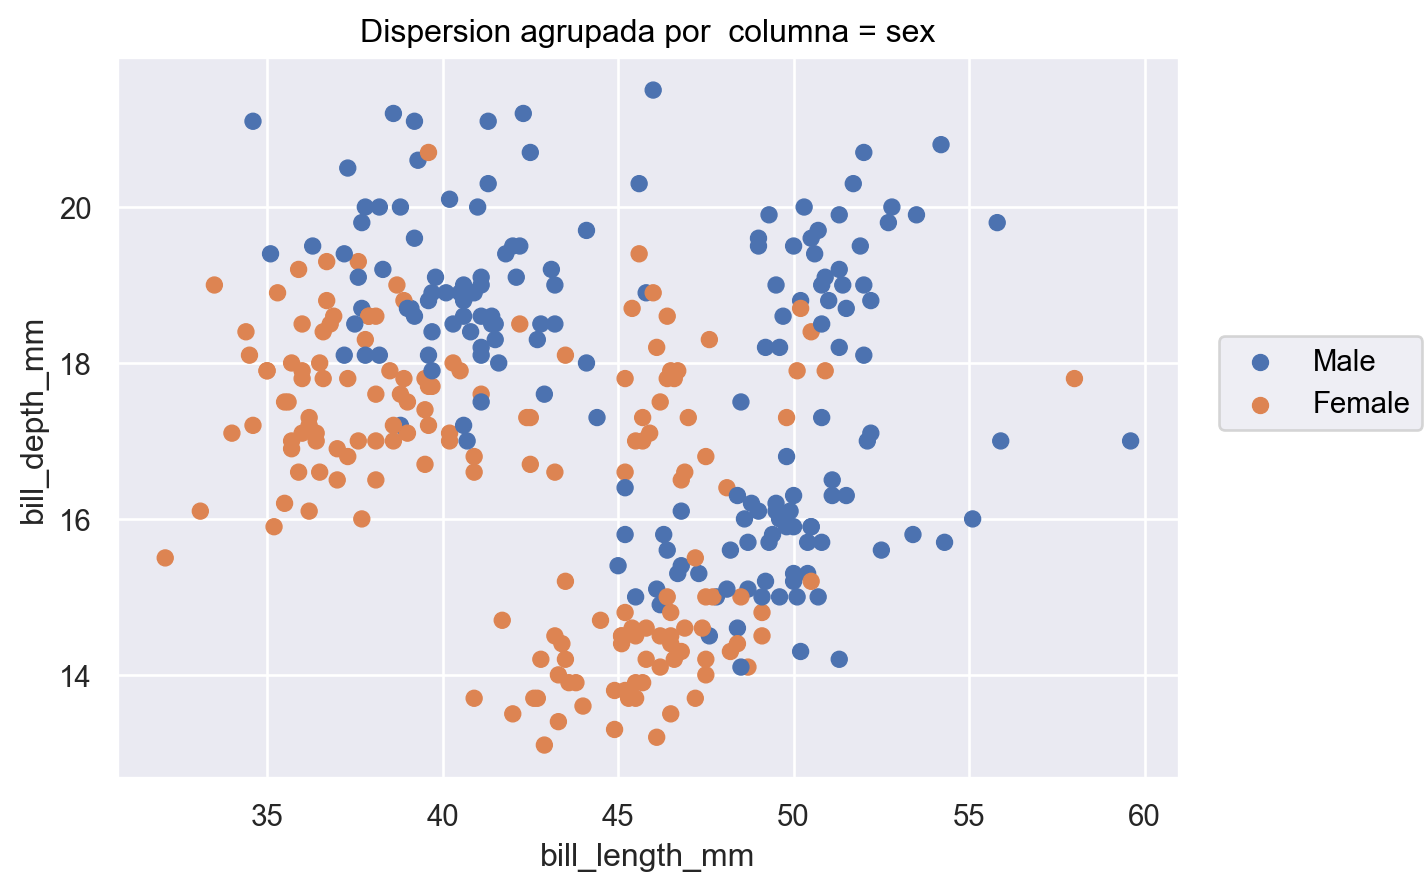

In [53]:
columnas = ["species","island","sex"]
for columna in columnas:
    (display(
        so.Plot(penguins , x ="bill_length_mm", y ="bill_depth_mm", color = columna)
        .add(so.Dot())
        .label(color="",title=f"Dispersion agrupada por  columna = {columna}"))
        )

## Ejercicio 5

A. Rehacer el grafico del ejercicio 4, coloreando los puntos segun el sexo. ¿Que se observa?

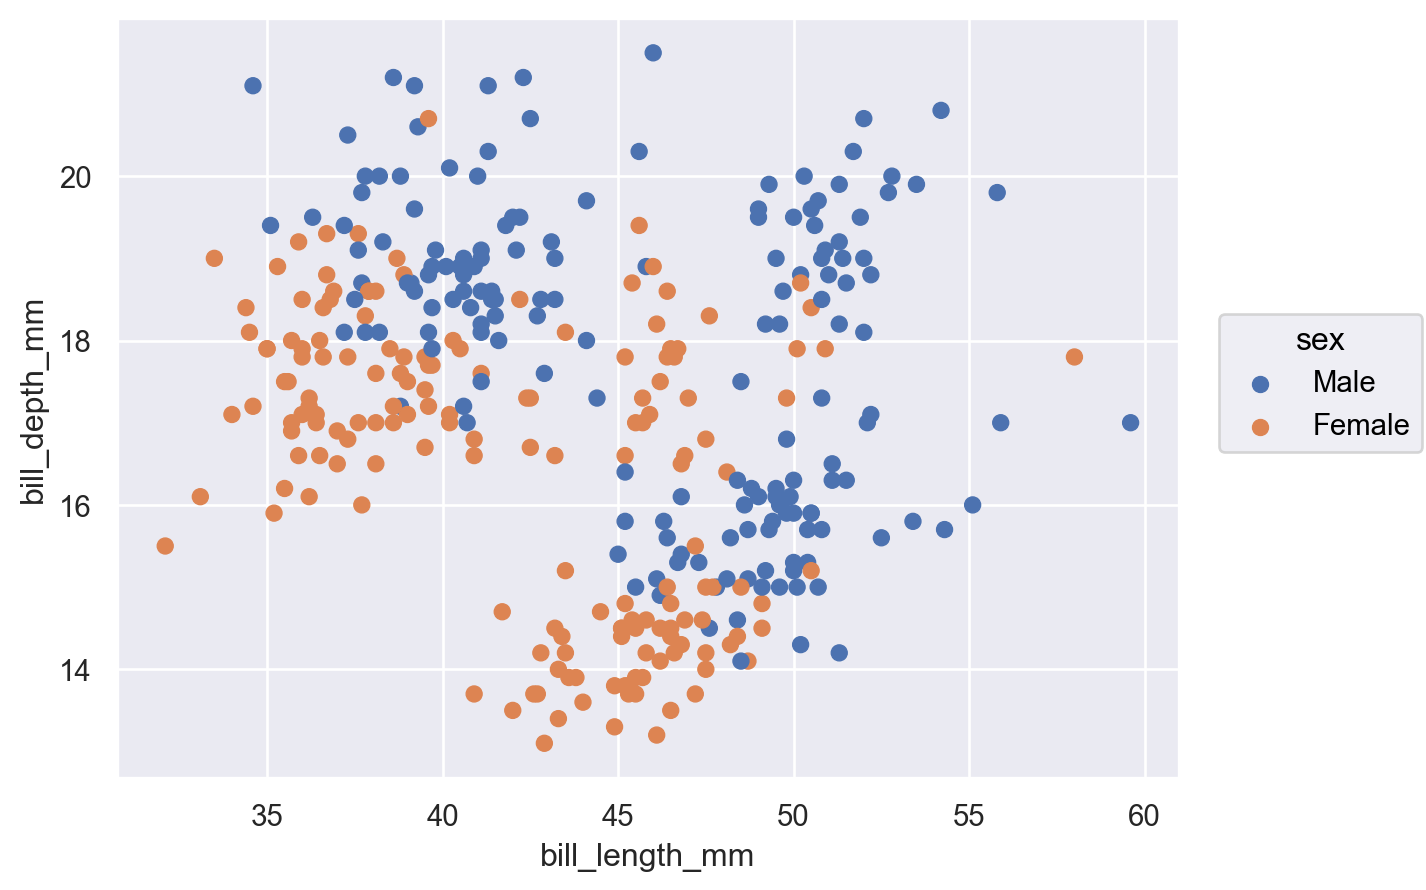

In [55]:
(
    so.Plot(
        penguins , x ="bill_length_mm", y ="bill_depth_mm", color = "sex")
        .add(so.Dot())
)

B. Usando la funcion `facet()` separar el grafico del item anterior en tres subgraficos, uno
para cada especie

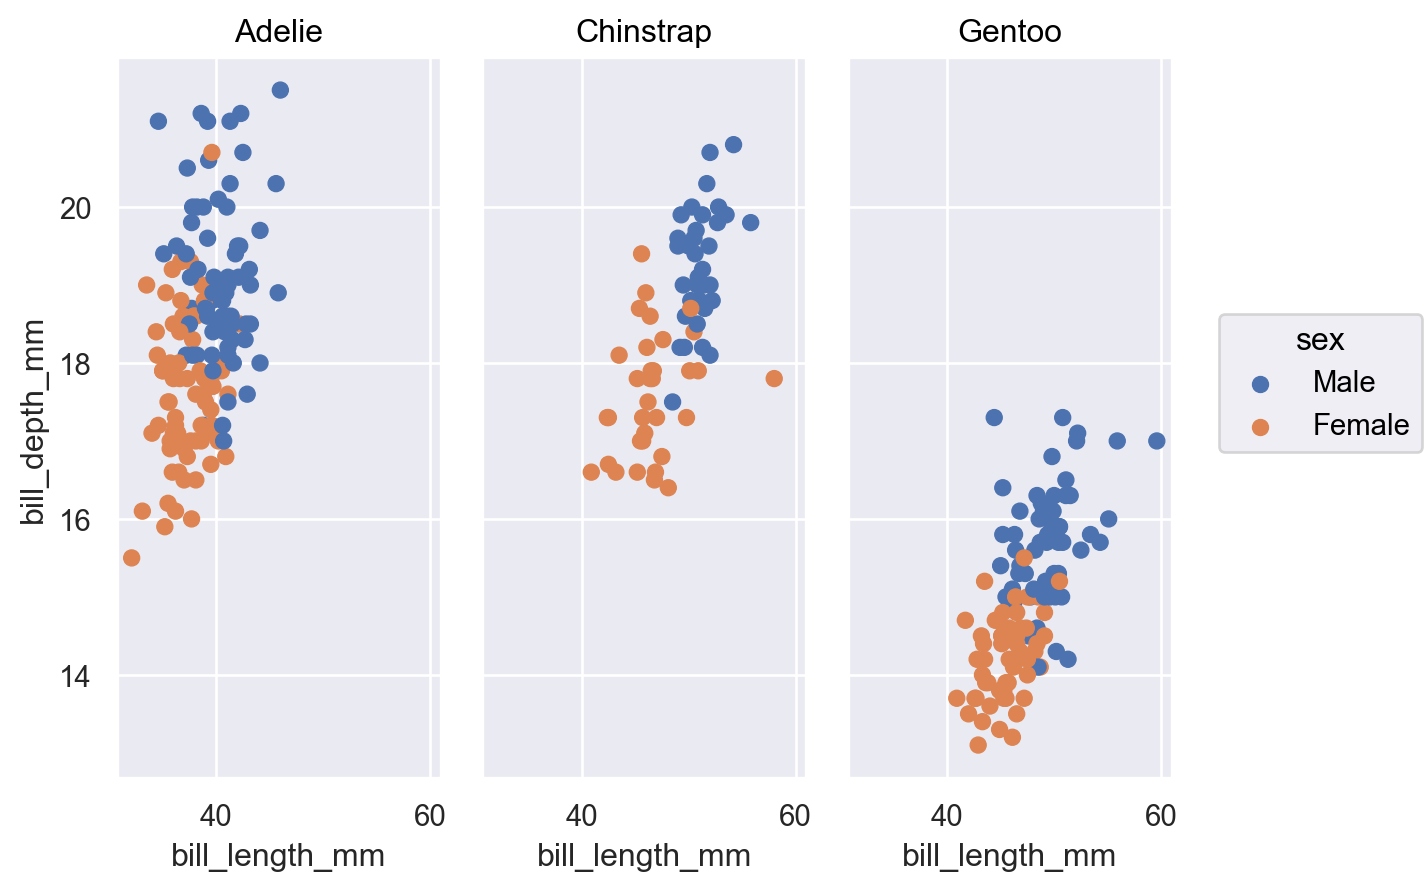

In [71]:
(
    so.Plot(
        penguins , x ="bill_length_mm", y ="bill_depth_mm", color = "sex")
    .add(so.Dot())
    .facet("species",wrap=3)
)

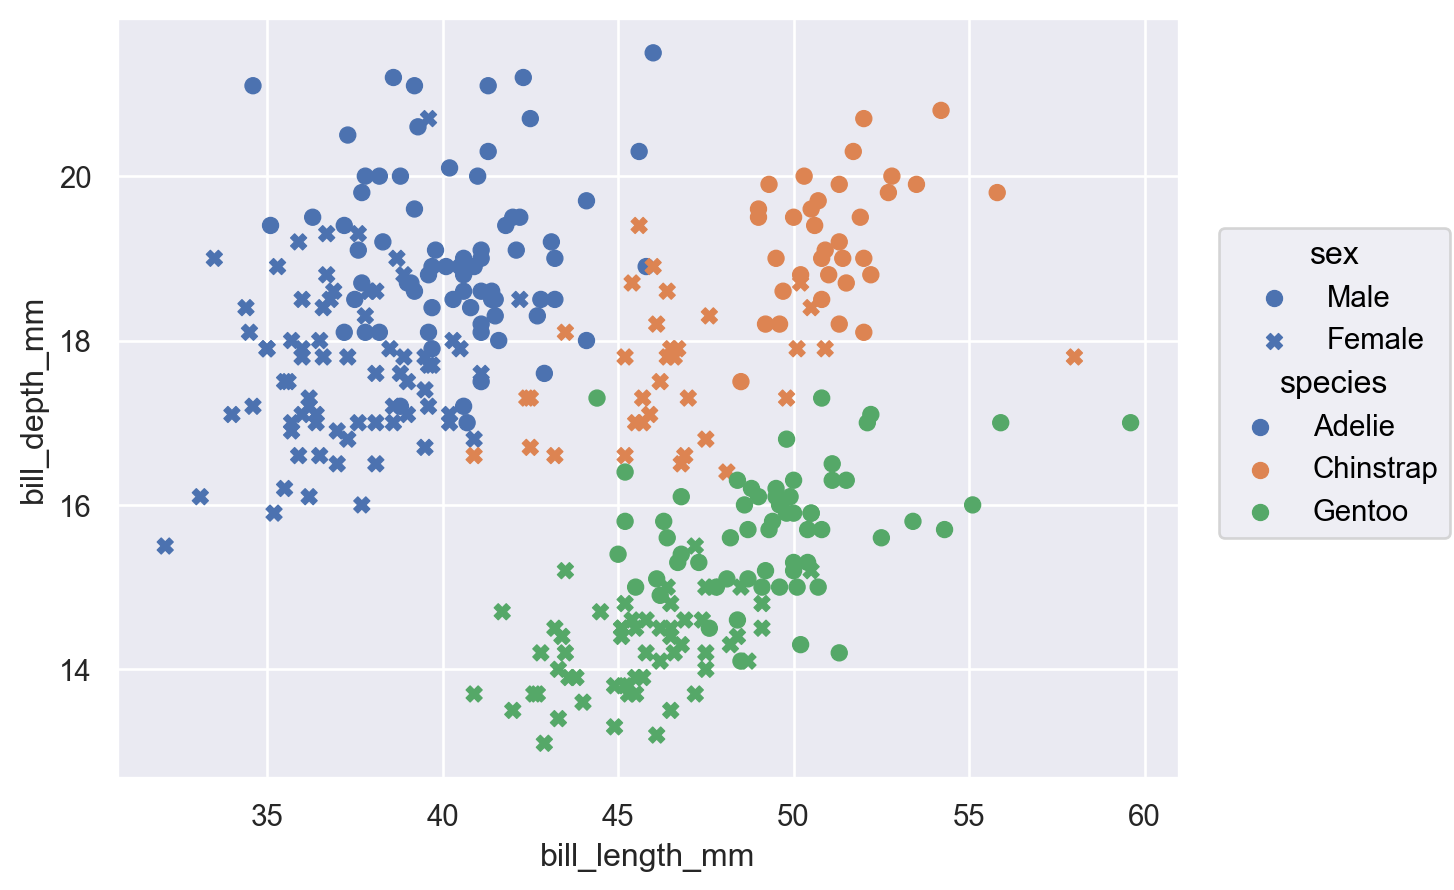

In [65]:
(
    so.Plot(
        penguins , x ="bill_length_mm", y ="bill_depth_mm", marker = "sex")

    .add(so.Dot(), color = "species"))

## Ejercicio 6


A. ¿Cuantos pinguinos hay en cada isla en la base de datos? 

Recordar los comandos `groupby()` y `size()` de la practica anterior.

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins_agrupados = penguins.groupby(["island"])